**Analysis Provided by:** Wyatte C. Hooper

**Analysis On:** November 18, 2023

**Problem Statement and Files Provided by:**


<center><p float="center">
  <img src="https://upload.wikimedia.org/wikipedia/commons/e/e9/4_RGB_McCombs_School_Brand_Branded.png" width="300" height="100"/>
  <img src="https://mma.prnewswire.com/media/1458111/Great_Learning_Logo.jpg?p=facebook" width="200" height="100"/>
</p></center>

# **Project Python Foundations: FoodHub Data Analysis**

**Marks: 60**

---

## **Table of Contents**


1.   Problem Statement
2.   Libraries and File Load
3.   Questions
> * Questions 1-5: Shape and Structure
> * Qustion 6-11: Univariable Exploratory Data Analysis:
> * Questions 12-16: Multivariable Exploratory Data Analysis
> * Questions 17: Conclusion and Reccomendations

---

## **Problem Statement**

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

---

## **Libraries and Files Load**

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# read the data
df = pd.read_csv('/content/drive/MyDrive/Great Learning/Python Fundamentals/Project 1: Food Hub/foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


**Observations:**

The data frame has 9 columns as mentioned in the Data Dictionary. Data in each row corresponds to the order placed by a customer.

---

## **Questions**

### **Shape and Stucture**

#### **Question 1:**
How many rows and columns are present in the data? [0.5 mark]

In [ ]:
shape = df.shape
print(shape)

(1898, 9)


**Observations:**
We can see from df.shape, the data has 1,898 rows and 9 columns.


#### **Question 2:**
What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Use info() to print a concise summary of the DataFrame
df.info()

#df.info() gave us information, but it listed 4 of the variables as object.  To confirm that these four objects are strings we could use the following for loop.
print('\n')
print("Here is each column name and its variable type.")
for column in df:
  print(f' - {column} is of type: {type(df[column][0])}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


Here is each column name and its variable type.
 - order_id is of type: <class 'numpy.int64'>
 - customer_id is of type: <class 'numpy.int64'>
 - restaurant_name is of type: <class 'str'>
 - cuisine_type is of type: <class 'str'>
 - cost_of_the_order is of

**Observations:**
*   Order_id: integer
*   Customer_id: integer
*   restraunt_name: object, string
*   cuisine_type: object, string
*   cost_of_order: float
*   day_of_the_week: object, string
*   rating: Object, string
*   food_preparation_time: integer
*   delivery_time: integer





#### **Question 3:**
Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
#This information was given to us in df.info() above, but we can reprint out the information.
df.info()

#pd.DataFrame({'Count': df.isnull().sum()})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Observations:**
As we can see in the "Non-Null Count" in the output of df.info(), each column has 1898 non-null rows.  Since we have 1898 rows in the data frame, this means that there are no null enties in the data frame.

We could also run `pd.DataFrame({'Count': df.isnull().sum()})` which would return a data frame with the null count for each columm.

In [ ]:
pd.DataFrame({'Count Null Entries': df.isnull().sum()})

,Count Null Entries
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### **Question 4:**
Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# df.describe() should give us a statistical summary of each of the quantitative variables
df.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


**Observations:**
The mean food prep time is 27.37 minutes.

The minimum food prep time is 20.00 minutes.

The maximum food prep time is 35.00 minutes.

#### **Question 5:**
How many orders are not rated? [1 mark]

In [ ]:
#This will create a sorted list of all unique ratings
rating_list = []
for rating in df['rating'].unique():
  rating_list += [rating]
rating_list = sorted(rating_list)

for rating in rating_list:
  number_of_ratings = df[df['rating']==rating]['rating'].count()
  print(f'There are {number_of_ratings} ratings of {rating}.')

There are 188 ratings of 3.
There are 386 ratings of 4.
There are 588 ratings of 5.
There are 736 ratings of Not given.


**Observations:**
There are 736 orders with a rating of "Not Given."  This represents 38.8% of the orders.

---

### **Univarible Exploratory Data Analysis (EDA)**

#### **Question 6:**
Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

---

**order_id:** We will start by making sure that all of entries in order_id are unique.  

In [ ]:
if df['order_id'].nunique() == shape[0]:
  print("All enteries in 'order_id' are unique")
else:
  print(f"There are {shape[0]-df['order_id'].nunique()} repeated entries in 'oder_id' ")

All enteries in 'order_id' are unique


**Observation:** All entries in `order_id` are unique.

---

**Customer_id:** We will now look at how many repeat customers there are and how many times they ordered.

In [ ]:
#summarizes df by counting how many times each customer made an order
customer_count = df.groupby(['customer_id'])['customer_id'].count()

total_customers = 0
total_orders = 0

for i in range(max(customer_count)+1):
  print(f"There are {(customer_count == i).sum()}, who ordered {i} times.")
  total_customers += (customer_count == i).sum()
  total_orders += i*(customer_count == i).sum()

print(f"There was {total_customers} customers in total")
print(f"There was {total_orders} orders in total.")

There are 0, who ordered 0 times.
There are 784, who ordered 1 times.
There are 267, who ordered 2 times.
There are 83, who ordered 3 times.
There are 33, who ordered 4 times.
There are 19, who ordered 5 times.
There are 6, who ordered 6 times.
There are 4, who ordered 7 times.
There are 1, who ordered 8 times.
There are 1, who ordered 9 times.
There are 1, who ordered 10 times.
There are 0, who ordered 11 times.
There are 0, who ordered 12 times.
There are 1, who ordered 13 times.
There was 1200 customers in total
There was 1898 orders in total.


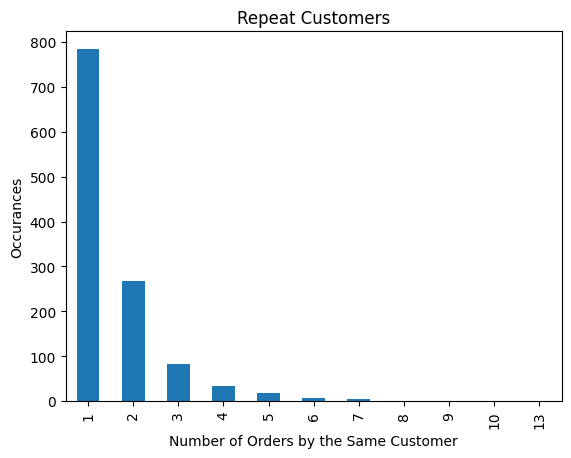

In [ ]:
#Plots the bar chart of how many orders each customer made
customer_count.value_counts().sort_index().plot.bar(x= 'Number of Repeat Orders', y = 'Number of Customers')
plt.title("Repeat Customers")
plt.xlabel("Number of Orders by the Same Customer")
plt.ylabel("Occurances");

**Observations:** The majority (784 out of 1200) of customers only made one order.  

**Restruant_name:**

In [ ]:
#Finds how many unique restruants were ordered from.
numRestaurants = len(df['restaurant_name'].unique())
print(f'There are {numRestaurants} different restaurants in our data.')


There are 178 different restaurants in our data.


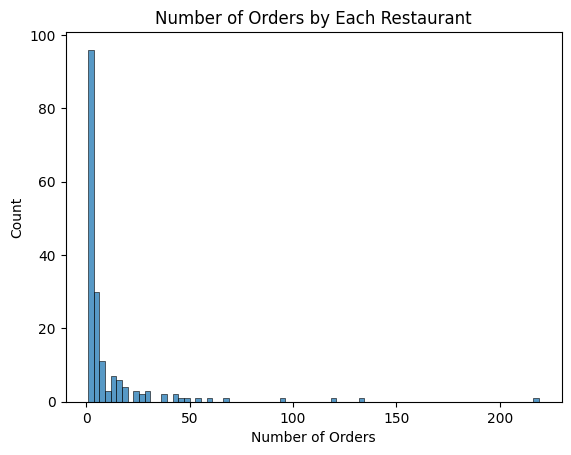

In [ ]:
#Summarizes df by counting how many times each restruant was ordered from
restaurant_count = df.groupby(['restaurant_name'])['restaurant_name'].count()
restaurant_count.head()

restaurant_count.describe()
sns.histplot(data=restaurant_count)
plt.title("Number of Orders by Each Restaurant")
plt.xlabel("Number of Orders")
plt.ylabel("Count");

In [ ]:
#Counts how many restaurants had exactly 1 order.
print(f"There are {len(restaurant_count.loc[restaurant_count == 1])} restaurants with exactly 1 order.")

#Counts how many restaurants had less than or exactly 5 orders
print(f"There are {len(restaurant_count.loc[restaurant_count <= 5])} restaurants with 5 or less orders.")


There are 50 restaurants with exactly 1 order.
There are 120 restaurants with 5 or less orders.


In [ ]:
restaurant_count.loc[restaurant_count > 50].sort_values()

restaurant_name
RedFarm Hudson                55
RedFarm Broadway              59
Parm                          68
Blue Ribbon Fried Chicken     96
Blue Ribbon Sushi            119
The Meatball Shop            132
Shake Shack                  219
Name: restaurant_name, dtype: int64

**Observations:** There are 178 unique restaurants that were ordered from.  120 of the restaurants had five or less orders, while the Shake Shack had the most orders at 219.  The top three restuarants each had over 100 orders.

**Cuisine_type:**

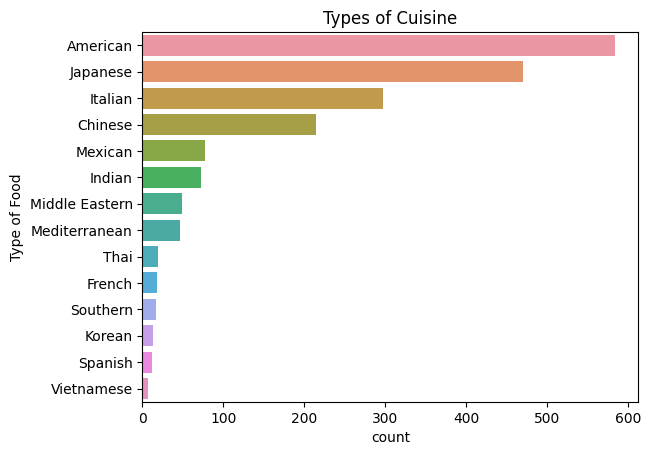

In [ ]:
sns.countplot(data=df, y='cuisine_type', order=df['cuisine_type'].value_counts().index)
plt.title("Types of Cuisine")
plt.ylabel("Type of Food");

**Observation:** American, Japanese and Italian were the three most popular cuisine types.  Vietnamses, Spanish and Korean were the three least popular cuisine types.

**Cost_of_the_order:**

In [ ]:
df['cost_of_the_order'].describe()

count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64

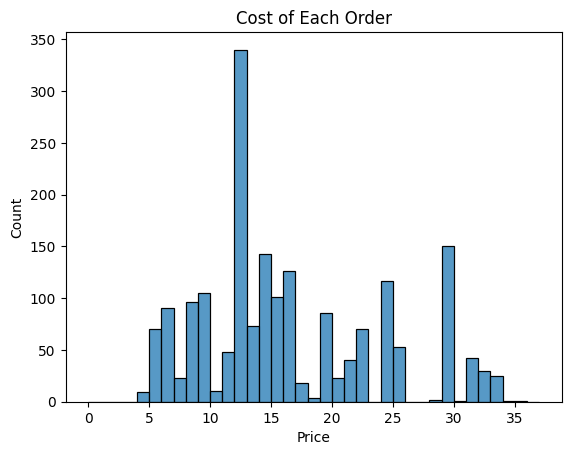

In [ ]:
sns.histplot(data=df, x='cost_of_the_order', binwidth=1, binrange=(0,np.ceil(max(df['cost_of_the_order']))+1))
plt.title("Cost of Each Order")
plt.xlabel("Price");


**Observations:** The mean cost of the order was \$16.50, but the mode was between \$13 and \$14. The median was \$14.14 and the distrabution is right skewed.  Orders ranged from \$4.14 to \$35.41.

**Day_of_the_week:**

In [ ]:
DayCount = df.groupby(['day_of_the_week'])['day_of_the_week'].count()

print(f"There were {DayCount['Weekday']} orders placed during the weekdays and {DayCount['Weekend']} placed during the weekend.")

There were 547 orders placed during the weekdays and 1351 placed during the weekend.


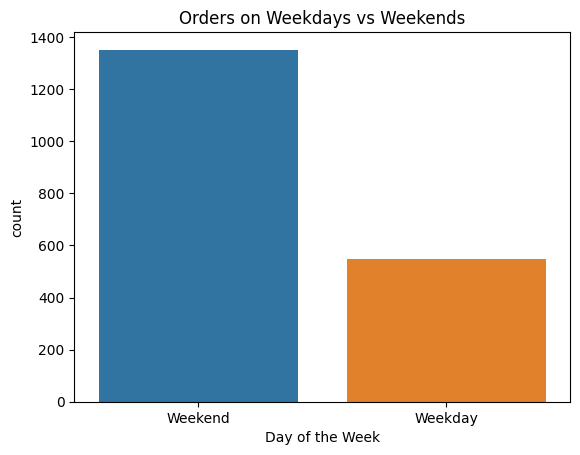

In [ ]:
sns.countplot(data=df, x='day_of_the_week')
plt.title("Orders on Weekdays vs Weekends")
plt.xlabel("Day of the Week");

**Observation:** There was significantly more orders on the weekends, than on the weekdays.  

**Rating:**

In [ ]:
RatingCount = df.groupby(['rating'])['rating'].count()
print(RatingCount)

rating
3            188
4            386
5            588
Not given    736
Name: rating, dtype: int64


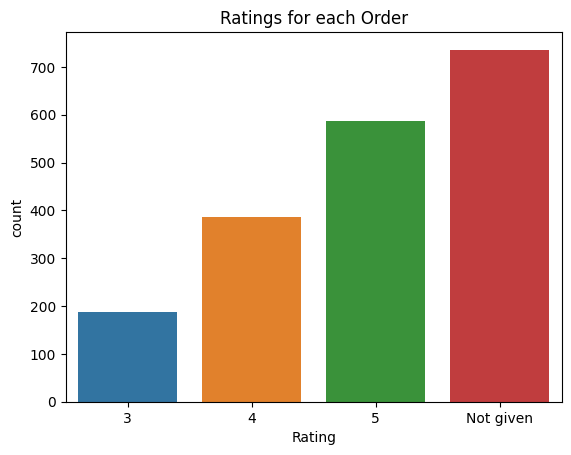

In [ ]:
sns.countplot(data=df, x='rating', order = rating_list)
plt.title("Ratings for each Order")
plt.xlabel("Rating");

**Observations:** There are 736 orders that did not give a rating.  Out of the orders that were rated, most orders got a 4 or a 5.

**Food_preperation_time:**

In [ ]:
df['food_preparation_time'].describe()

count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64

In [ ]:
PrepCount = df.groupby(['food_preparation_time'])['food_preparation_time'].count()
print(PrepCount)

food_preparation_time
20    119
21    135
22    123
23    123
24    121
25    113
26    115
27    123
28    121
29    109
30    119
31    116
32    113
33    118
34    113
35    117
Name: food_preparation_time, dtype: int64


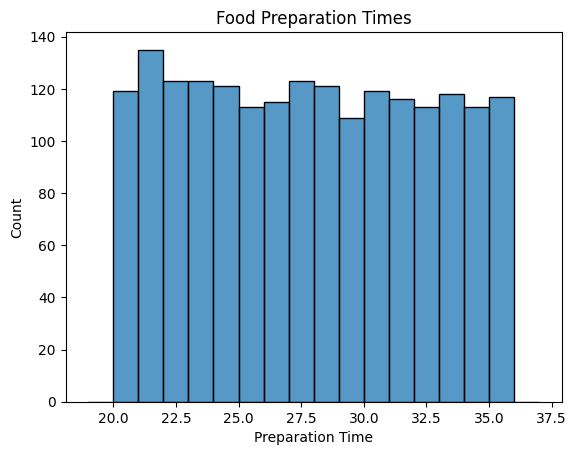

In [ ]:
sns.histplot(data=df, x = 'food_preparation_time', binwidth=1, binrange=(19,37))
plt.title("Food Preparation Times")
plt.xlabel("Preparation Time");

**Observations:** The food preparation time is uniformly distributed on the range of 20 to 36 minutes.

**Delivery_time:** Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information.

In [ ]:
deliveryStats = df['delivery_time'].describe()
print(deliveryStats)

count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64


In [ ]:
DeliveryCount = df.groupby(['delivery_time'])['delivery_time'].count()
DeliveryCount

delivery_time
15     87
16     90
17     78
18     83
19     90
20     88
21     81
22     85
23     77
24    162
25    120
26    141
27    138
28    148
29    148
30    133
31     41
32     59
33     49
Name: delivery_time, dtype: int64

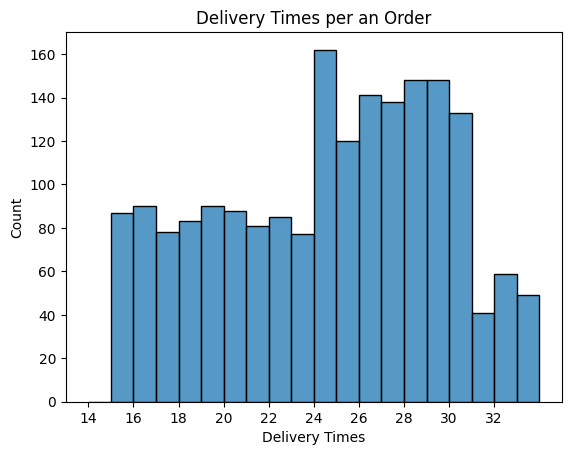

In [ ]:
sns.histplot(data=df, x='delivery_time', binwidth = 1, binrange=(14, 34));
plt.title("Delivery Times per an Order")
plt.xlabel("Delivery Times")
plt.xticks(range(14, 34, 2));

**Observations:** The delivery times ranged from 15 to 33 minutes.  Between 15 and 23 minutes the distribution is uniformed with about 85 counts per a minute.  Between 24 and 30 minutes there is about 140 counts per a minute, and then it drops down to about 50 counts per a minute between 31 and 33.

#### **Question 7**:
Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
#Uses restaurant count from question 6.
restaurant_count.sort_values(ascending= False).head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

**Observations:** The top 5 restaurants with the most orders are Shake Shack (219), The Meatball Shop (132), Blue Ribbon Sushi (119), Blue Ribbon Fried Chiecken (96) and Parm (68).


#### **Question 8**:
 Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
#Uses groupby to count everything by day_of_the_week and cuisine_type
df.groupby(['day_of_the_week', 'cuisine_type']).count()['restaurant_name']

day_of_the_week  cuisine_type  
Weekday          American          169
                 Chinese            52
                 French              5
                 Indian             24
                 Italian            91
                 Japanese          135
                 Korean              2
                 Mediterranean      14
                 Mexican            24
                 Middle Eastern     17
                 Southern            6
                 Spanish             1
                 Thai                4
                 Vietnamese          3
Weekend          American          415
                 Chinese           163
                 French             13
                 Indian             49
                 Italian           207
                 Japanese          335
                 Korean             11
                 Mediterranean      32
                 Mexican            53
                 Middle Eastern     32
                 Southern       

**Observations:** From the series above, we can see that on the weekends, the most popular type of cuisine is American with 415 orders.


#### **Question 9**:
What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
#Finds the len of a datafrom with only the orders that cost more than $20, and then divides it by the length of all of the entries.
perOver20 = round(len(df.loc[df['cost_of_the_order'] > 20])/len(df)*100,2)
print(f'{perOver20}% of orders cost over $20.')

29.24% of orders cost over $20.


**Observations:** About 29.2% of the orders cost strictly more than $20 dollars.


#### **Question 10**:
What is the mean order delivery time? [1 mark]

In [ ]:
#Pulls the mean from the df['delivery_time'] from question 6
deliveryStats['mean']

24.161749209694417

**Observations:**  The mean delivery time is approximantly 24.2 minutes.


#### **Question 11:**
The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
#Pulls from the customer_count in problem 6
customer_count.sort_values(ascending = False).head(4)

customer_id
52832     13
47440     10
83287      9
250494     8
Name: customer_id, dtype: int64

**Observations:** We can see that the top three customers have an id of 52832, 47440, and 83287.  We can also see that there is no tie for 3rd place.


### **Multivariate Exploratory Data Analysis**

#### **Question 12**:
Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]

In [ ]:
df.groupby(['cuisine_type', 'restaurant_name']).count()['rating']

cuisine_type  restaurant_name           
American      'wichcraft                     1
              5 Napkin Burger                5
              67 Burger                      1
              Alidoro                        1
              Bareburger                    27
                                            ..
Thai          Song Thai Restaurant & Bar     2
              Spice Thai                     1
Vietnamese    Nha Trang One                  1
              V-Nam Cafe                     4
              Xe May Sandwich Shop           2
Name: rating, Length: 179, dtype: int64

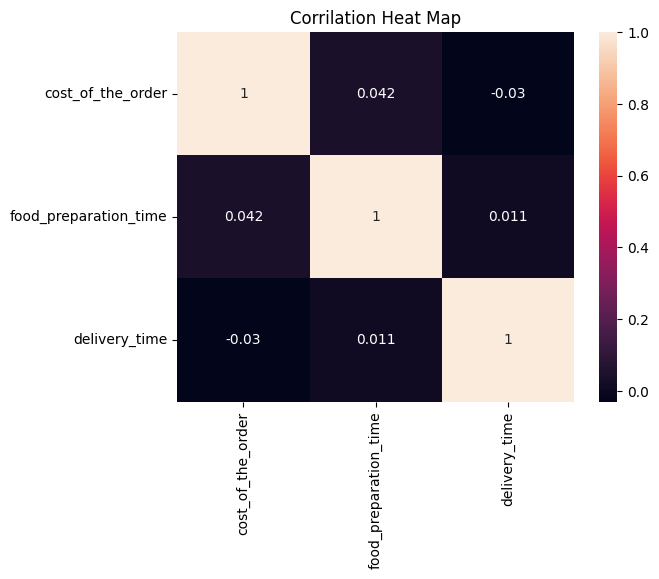

In [ ]:
sns.heatmap(data=df[['cost_of_the_order', 'rating', 'food_preparation_time', 'delivery_time']].corr(numeric_only=True), annot = True)
plt.title('Corrilation Heat Map');

Text(0.5, 1.0, 'Rating and Day of Week Compared to Cost')

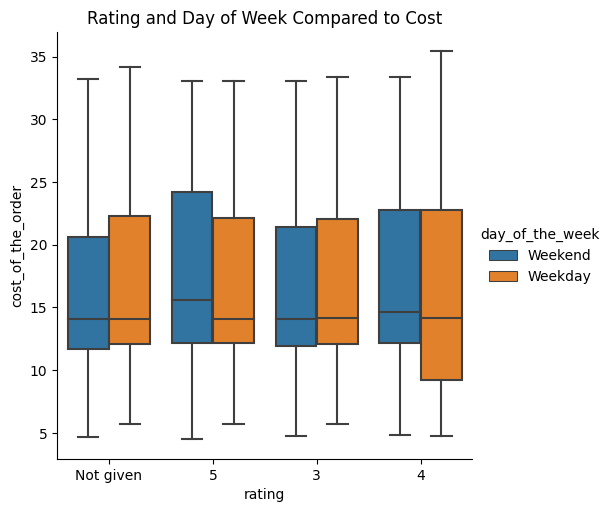

In [ ]:
sns.catplot(data=df, x='rating', y='cost_of_the_order',hue = "day_of_the_week", kind = 'box')
plt.title('Rating and Day of Week Compared to Cost');

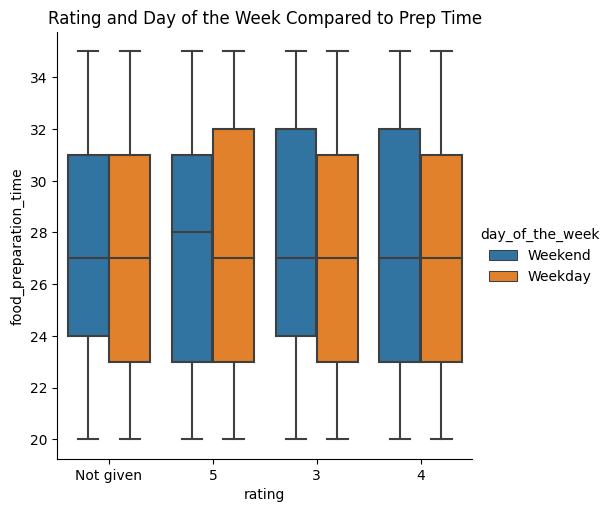

In [ ]:
sns.catplot(data=df, x='rating', y='food_preparation_time',hue = "day_of_the_week", kind = 'box')
plt.title('Rating and Day of the Week Compared to Prep Time');

Text(0.5, 1.0, 'Rating and Day of the week Compared to Delivery Time')

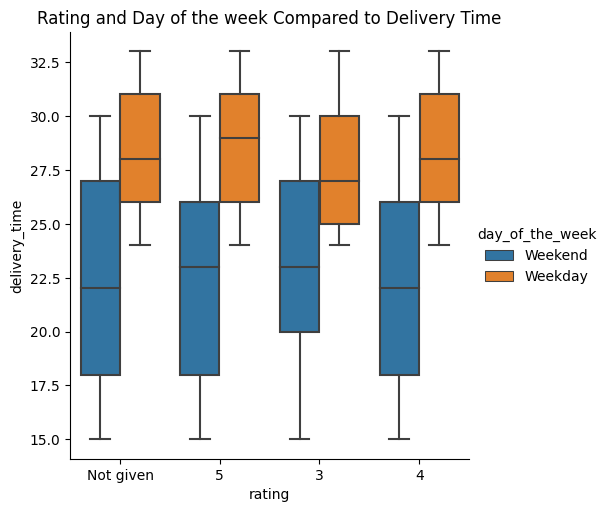

In [ ]:
sns.catplot(data=df, x='rating', y='delivery_time',hue = "day_of_the_week", kind = 'box')
plt.title('Rating and Day of the week Compared to Delivery Time')

**Observations:** Weekday delivery times are significantly higher.

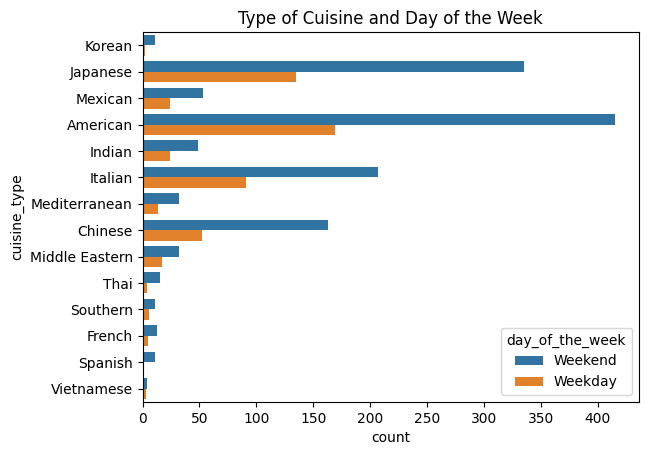

In [ ]:
sns.countplot(data=df, y= 'cuisine_type', hue='day_of_the_week' )
plt.title('Type of Cuisine and Day of the Week');

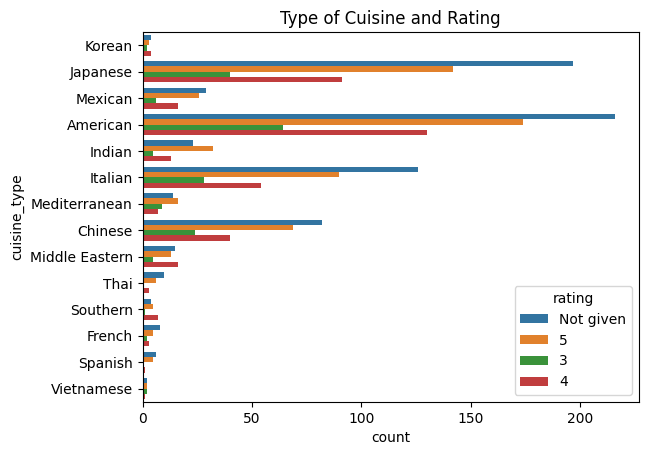

In [ ]:
sns.countplot(data=df, y= 'cuisine_type', hue='rating' );
plt.title('Type of Cuisine and Rating');

#### **Question 13:**
The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
#Changes the "Not given" in the ratings to NaN, and then creates a new dataframe
new_df = df
new_df['rating'] = df['rating'].replace('Not given', np.NaN)
new_df['rating'] = pd.to_numeric(new_df['rating'])

# Groups by restaurant_name and gives the count and rating
new_df = new_df.groupby('restaurant_name').agg({'rating':  ['mean', 'count']})

#Grabs the rows from new_df where the rating is above 4 and the order count is above 50
new_df.loc[(new_df['rating', 'count'] >50) & (new_df['rating', 'mean'] > 4) ]

rating      
                               mean count
restaurant_name                          
Blue Ribbon Fried Chicken  4.328125    64
Blue Ribbon Sushi          4.219178    73
Shake Shack                4.278195   133
The Meatball Shop          4.511905    84

**Observations:** There are four restaurants the fullfill these conditions. They are: 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shake', and 'The Meatball Shop.'


#### **Question 14:**
The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
revenue = 0
errorCount = 0
for order in df['cost_of_the_order']:
  if order > 20:
    revenue += 0.25*order
  elif order > 5:
    revenue += 0.15*order
  else:
    errorCount += 1
print(f'The revenue is ${round(revenue,2)}.  There was {errorCount} orders where the total was less than $5.00.')

The revenue is $6166.3.  There was 9 orders where the total was less than $5.00.


**Observations:** The total revenue is \$6,166.30. There was nine orders that were under under \$5 and therefore did not contribute to the revenue.


#### **Question 15:**
The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
df['Total_Time'] = df['delivery_time']+df['food_preparation_time']
oders_over_60 = round((len(df.loc[df['Total_Time'] > 60])/len(df))*100, 2)

print(f"{oders_over_60}% of orders take more than 60 minutes between preparation and delivery.")

10.54% of orders take more than 60 minutes between preparation and delivery.


In [ ]:
df['Total_Time'].describe()

count    1898.000000
mean       51.533720
std         6.833603
min        35.000000
25%        47.000000
50%        52.000000
75%        56.000000
max        68.000000
Name: Total_Time, dtype: float64

Text(0.5, 0, 'Total time')

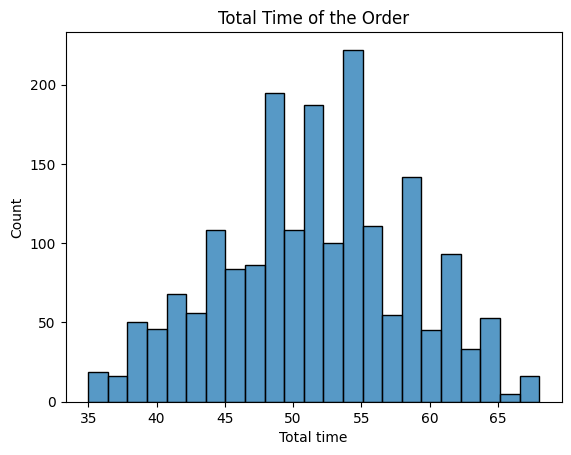

In [ ]:
sns.histplot(data=df, x='Total_Time')
plt.title('Total Time of the Order')
plt.xlabel('Total time')

**Observations:** There are 200 out of the 1898 orders that took more than 60 minutes between preparation and delivery.  This is about 10.58% of all orders.


#### **Question 16:**
 The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
df.groupby('day_of_the_week').mean(numeric_only=True)[['food_preparation_time', 'delivery_time', 'Total_Time']]

,food_preparation_time,delivery_time,Total_Time
day_of_the_week,,,
Weekday,27.212066,28.340037,55.552102
Weekend,27.436714,22.470022,49.906736


**Observations:** There is no significant difference between the food preparation time and delivery time on weekdays versus weekends.  The mean delivery time of weekdays is about 6 minutes longer than the mean delivery time of weekends.


### Conclusion and Recommendations

#### **Question 17:**
 What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

**Conclusions:**
* There was 1898 orders in the data we were given.
* The median cost of the orders is \$14.14, and Q1 and Q2 are \$12.08 and \$22.30.
* The mean time that an order took to get to the customer was 51.53 minutes with a standard deviation is 6.83 minutes.
* 38.8% of orders (736/1898) did not have a rating.  About 51.3% of orders (974/1898) had a rating of 4 or 5.
* 41.3% of customers only ordered once, but there was one customer who ordered 13 times.
* 67.4% of the restaurants (120/178) that appeared in our data had less than 5 orders.
* There was one restaurant (Shake Shack) that had 219 orders.
* 71.2% of orders (1351/1898) were placed on a weekend.
* 70.76% of orders (1343/1898) were under \$20.00.
* The mean food delivery times was 5.87 minutes longer on weekdays than weekends.



**Recommendations:**

* You should look at the number Mexican, Indian, Middle Eastern, Mediterranean, Thai, French, Southern, Korean, Spanish, and Vietnamese restaurants in the area.  If any of these styles of restaurants are under represented in our data, we could offer discounts to encourage customers to order from there or put up advertisments in or near those restaurants.
* If the longer delivery times on weekdays is due to having less delivery drivers, then you should offer a bonus for delivering on weekdays.
* Once delievery times for weekdays matches weekends, we could offer discounts to encourage customers to make more orders on the weekdays.
* To encourage customers to make larger orders, we could offer a discount for orders over a certain amount.
* We could look at the changing the user interface when asking for a rating to increase the percentage of people that complete the ratings.

In [66]:
!jupyter nbconvert --to html PYF_Project_LearnerNotebook_FullCode.ipynb

[NbConvertApp] Converting notebook PYF_Project_LearnerNotebook_FullCode.ipynb to html
[NbConvertApp] Writing 1213374 bytes to PYF_Project_LearnerNotebook_FullCode.html


---